# Pandas session1 recap

In [13]:
import pandas as pd

data = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

print(data)

print(type(data))

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
<class 'pandas.core.frame.DataFrame'>


In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes
None


In [3]:
print(data.describe())

         A    B    C
count  3.0  3.0  3.0
mean   2.0  5.0  8.0
std    1.0  1.0  1.0
min    1.0  4.0  7.0
25%    1.5  4.5  7.5
50%    2.0  5.0  8.0
75%    2.5  5.5  8.5
max    3.0  6.0  9.0


In [ ]:
# Slicing

print(data['A'])  # column

print(data.iloc[1]) # row
print(type(data.iloc[1]))

0    1
1    2
2    3
Name: A, dtype: int64
A    2
B    5
C    8
Name: 1, dtype: int64
<class 'pandas.core.series.Series'>


In [8]:
# single value
print(data.iloc[1, 2])
print(data['B'][1])

8
5


In [20]:
# Change index
data.index = ['x', 'y', 'z']
print(data)


   A  B  C
x  1  4  7
y  2  5  8
z  3  6  9


In [19]:
data_indexed = data.set_index('A', drop=True)
# data_indexed.columns.name = 'Columns'
print(data_indexed)

   B  C
A      
1  4  7
2  5  8
3  6  9


In [25]:
# Reshaping the dataframes

# Melt Example
data = pd.DataFrame(
    {
        'Names': ['Alice', 'Bob', 'Charlie'],
        'Cairo': [1, 0, 1],
        'Alex': [0, 1, 0],
        'Age': [25, 30, 35]
    }
)

print("____Data Before Melt____")
print(data)

data_melted = pd.melt(data, id_vars=['Names', 'Age'], var_name='City', value_name='Visited')
print("____Data After Melt____")
print(data_melted)

____Data Before Melt____
     Names  Cairo  Alex  Age
0    Alice      1     0   25
1      Bob      0     1   30
2  Charlie      1     0   35
____Data After Melt____
     Names  Age   City  Visited
0    Alice   25  Cairo        1
1      Bob   30  Cairo        0
2  Charlie   35  Cairo        1
3    Alice   25   Alex        0
4      Bob   30   Alex        1
5  Charlie   35   Alex        0


In [30]:
# Pivot Example
data_pivoted = data_melted.pivot(index=['Names', 'Age'], columns='City', values='Visited')
print("____Data After Pivot____")
print(data_pivoted)

____Data After Pivot____
City         Alex  Cairo
Names   Age             
Alice   25      0      1
Bob     30      1      0
Charlie 35      0      1


In [33]:
# Concatenation and Merging
data1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie']
})
data2 = pd.DataFrame({
    'ID': [4, 5, 6],
    'Name': ['David', 'Eva', 'Frank']
})
data_concat = pd.concat([data1, data2], ignore_index=True)
print("____Concatenated Data____")
print(data_concat)

____Concatenated Data____
   ID     Name
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David
4   5      Eva
5   6    Frank


In [35]:
# Adding more columns
data_concat['Age'] = [25, 30, 35, 40, 28, 33]
print("____Data After Adding Age Column____")
print(data_concat)

____Data After Adding Age Column____
   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
4   5      Eva   28
5   6    Frank   33


In [36]:
# Selections based on conditions
adults = data_concat[data_concat['Age'] >= 30]
print("____Adult Data____")
print(adults)

____Adult Data____
   ID     Name  Age
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
5   6    Frank   33


# Session 2

In [37]:
# Read CSV data
data = pd.read_csv('../data/netflix_movies (1).csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [38]:
data.shape

(8807, 12)

In [49]:
data_sample = data.sample(1000)
data_sample.shape

(1000, 12)

In [50]:
# Count unique directors
print(data_sample['director'].nunique())

# Value counts of directors
print(data_sample['director'].value_counts())

654
director
Paul Greengrass           3
Atom Egoyan               3
Raúl Campos, Jan Suter    3
Andibachtiar Yusuf        3
Eli Roth                  3
                         ..
Douglas Attal             1
Kim Seong-hun             1
Sean Menard               1
Raj Kapoor                1
Makarand Mane             1
Name: count, Length: 654, dtype: int64


In [ ]:
# Group by type
print(data_sample.groupby('type').size())

type
Movie      688
TV Show    312
dtype: int64


In [55]:
# Group by type
print(data_sample.groupby('listed_in').size())

listed_in
Action & Adventure                                                15
Action & Adventure, Anime Features, International Movies           4
Action & Adventure, Children & Family Movies, Comedies             1
Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy     1
Action & Adventure, Classic Movies                                 1
                                                                  ..
TV Dramas, TV Sci-Fi & Fantasy                                     1
TV Dramas, TV Thrillers                                            1
TV Horror, TV Mysteries, TV Thrillers                              1
TV Shows                                                           1
Thrillers                                                          7
Length: 215, dtype: int64


In [57]:
# Group by type
print(data_sample.groupby('listed_in').size().sort_values(ascending=False).head(20))

listed_in
Documentaries                                             43
Dramas, International Movies                              43
Dramas, Independent Movies, International Movies          37
Stand-Up Comedy                                           36
Comedies, Dramas, International Movies                    34
Comedies, International Movies, Romantic Movies           25
Documentaries, International Movies                       25
Dramas, International Movies, Romantic Movies             23
Comedies, International Movies                            21
Children & Family Movies, Comedies                        20
Kids' TV                                                  20
Dramas, International Movies, Thrillers                   19
Children & Family Movies                                  18
International TV Shows, Romantic TV Shows, TV Dramas      16
Action & Adventure, International Movies                  15
Action & Adventure                                        15
Dramas, Thrill

In [58]:
# Dealing with missing values
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 8000 to 5175
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1000 non-null   object
 1   type          1000 non-null   object
 2   title         1000 non-null   object
 3   director      697 non-null    object
 4   cast          914 non-null    object
 5   country       903 non-null    object
 6   date_added    999 non-null    object
 7   release_year  1000 non-null   int64 
 8   rating        1000 non-null   object
 9   duration      1000 non-null   object
 10  listed_in     1000 non-null   object
 11  description   1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 101.6+ KB


In [59]:
# drop na
data_sample = data_sample.dropna()
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604 entries, 5965 to 7869
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       604 non-null    object
 1   type          604 non-null    object
 2   title         604 non-null    object
 3   director      604 non-null    object
 4   cast          604 non-null    object
 5   country       604 non-null    object
 6   date_added    604 non-null    object
 7   release_year  604 non-null    int64 
 8   rating        604 non-null    object
 9   duration      604 non-null    object
 10  listed_in     604 non-null    object
 11  description   604 non-null    object
dtypes: int64(1), object(11)
memory usage: 61.3+ KB


In [62]:
data_sample = data.sample(1000)
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 818 to 4077
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1000 non-null   object
 1   type          1000 non-null   object
 2   title         1000 non-null   object
 3   director      710 non-null    object
 4   cast          905 non-null    object
 5   country       909 non-null    object
 6   date_added    1000 non-null   object
 7   release_year  1000 non-null   int64 
 8   rating        998 non-null    object
 9   duration      1000 non-null   object
 10  listed_in     1000 non-null   object
 11  description   1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 101.6+ KB


In [63]:
data_sample.fillna({'director': 'Unknown', 'country': 'Unknown'}, inplace=True)
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 818 to 4077
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1000 non-null   object
 1   type          1000 non-null   object
 2   title         1000 non-null   object
 3   director      1000 non-null   object
 4   cast          905 non-null    object
 5   country       1000 non-null   object
 6   date_added    1000 non-null   object
 7   release_year  1000 non-null   int64 
 8   rating        998 non-null    object
 9   duration      1000 non-null   object
 10  listed_in     1000 non-null   object
 11  description   1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 101.6+ KB


In [66]:
# Merge Example

data = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

data2 = pd.DataFrame({
    'A': [1, 2, 4],
    'D': [10, 11, 12],
    'E': [13, 14, 15]
})

data_merged = pd.merge(data, data2, on='A', how='right')
print("____Merged Data____")
print(data_merged)

____Merged Data____
   A    B    C   D   E
0  1  4.0  7.0  10  13
1  2  5.0  8.0  11  14
2  4  NaN  NaN  12  15


In [67]:
data_merged = pd.merge(data, data2, on='A', how='outer')
print("____Merged Data____")
print(data_merged)

____Merged Data____
   A    B    C     D     E
0  1  4.0  7.0  10.0  13.0
1  2  5.0  8.0  11.0  14.0
2  3  6.0  9.0   NaN   NaN
3  4  NaN  NaN  12.0  15.0


# Plotting

In [71]:
import matplotlib.pyplot as plt

data = pd.read_csv('../data/netflix_movies (1).csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


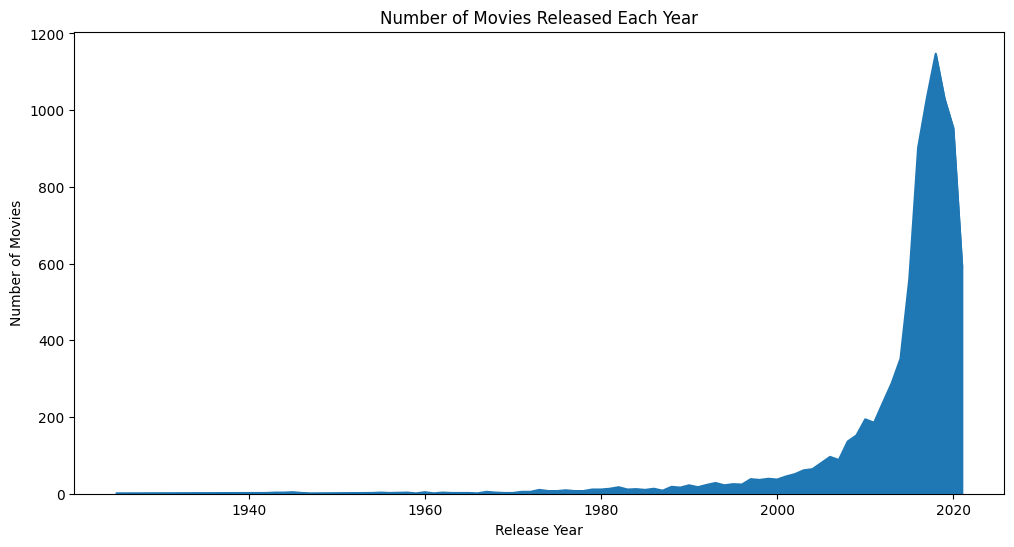

In [74]:
movies_per_year = data.groupby('release_year').size()
movies_per_year.plot(kind='area', figsize=(12, 6))
plt.title('Number of Movies Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64


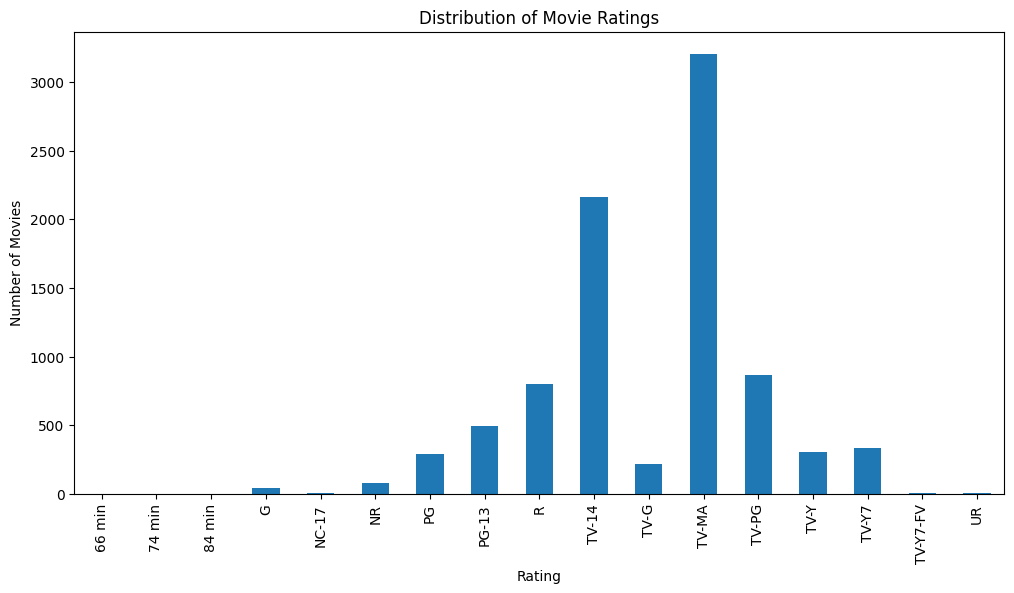

In [81]:
movies_per_rating = data.groupby('rating').size()
print(movies_per_rating)
movies_per_rating.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

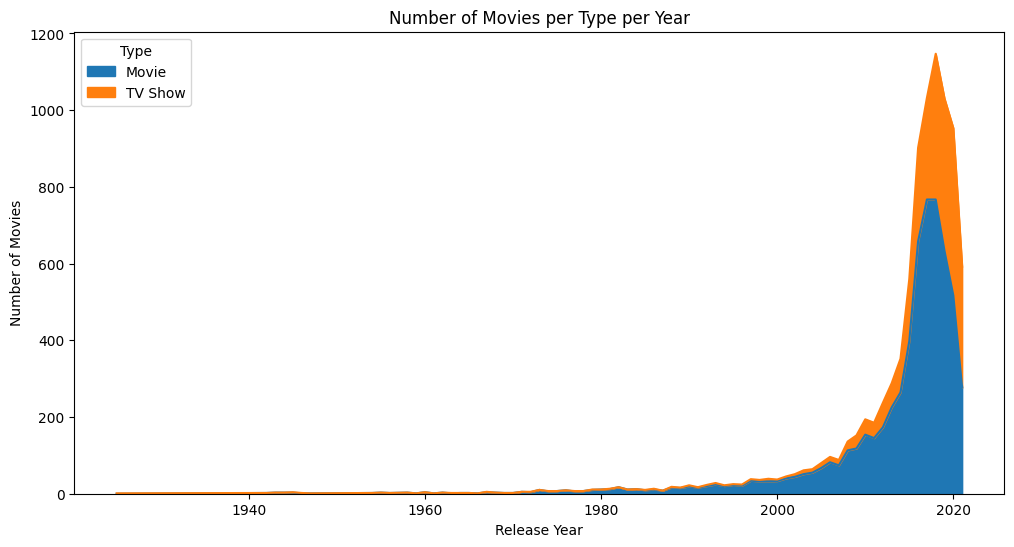

In [83]:
movies_per_type_per_year = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
# print(movies_per_type_per_year)
movies_per_type_per_year.plot(kind='area', figsize=(12, 6))
plt.title('Number of Movies per Type per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Type')
plt.show()

# Changing data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [87]:
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   object        
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 825.8+ KB


In [89]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [91]:
data['released_since'] = 2025 - data['release_year'].dt.year
data['released_since']

0        5
1        4
2        4
3        4
4        4
        ..
8802    18
8803     7
8804    16
8805    19
8806    10
Name: released_since, Length: 8807, dtype: int32

In [92]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,released_since
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",5
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,4
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",4
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4


# Mapping

In [93]:
data['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [94]:
# apply a function to map categories to broader categories
data['spreaded_genres'] = data.apply(lambda row: row['listed_in'].split(', '), axis=1)
print(data['spreaded_genres'].head())

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: spreaded_genres, dtype: object


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          7976 non-null   object        
 6   date_added       8797 non-null   object        
 7   release_year     8807 non-null   datetime64[ns]
 8   rating           8803 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  released_since   8807 non-null   int32         
 13  spreaded_genres  8807 non-null   object        
dtypes: datetime64[ns](1), int32(1), object(1

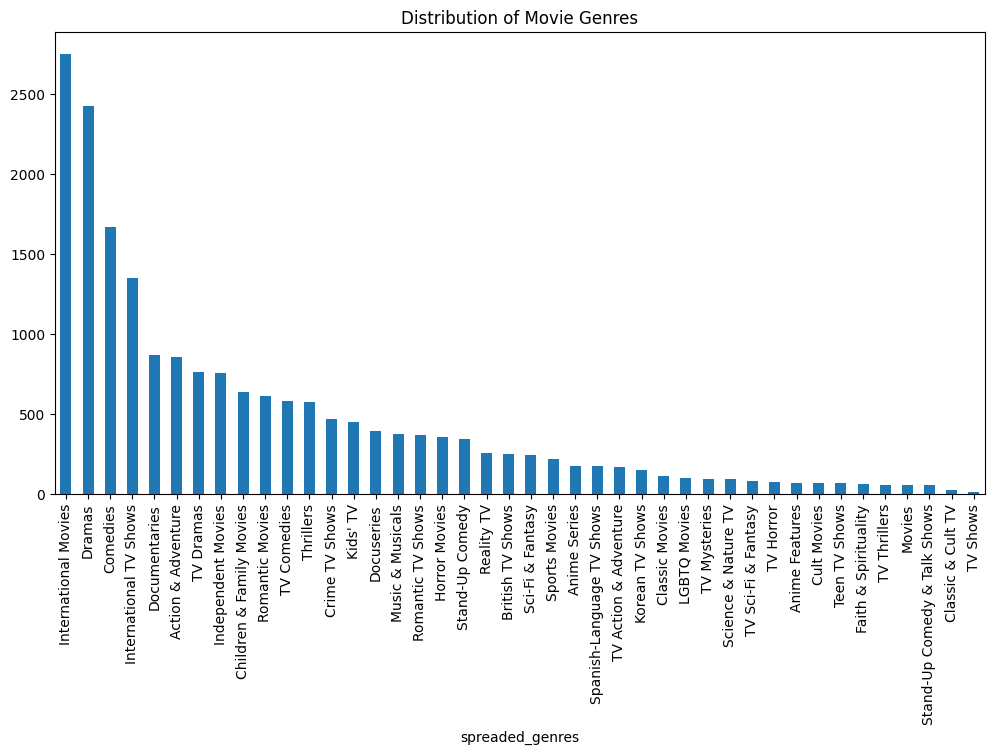

In [102]:
generes_exploded = data.explode('spreaded_genres')
# print(generes_exploded['spreaded_genres'].value_counts())

generes_exploded['spreaded_genres'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Movie Genres')
plt.show()

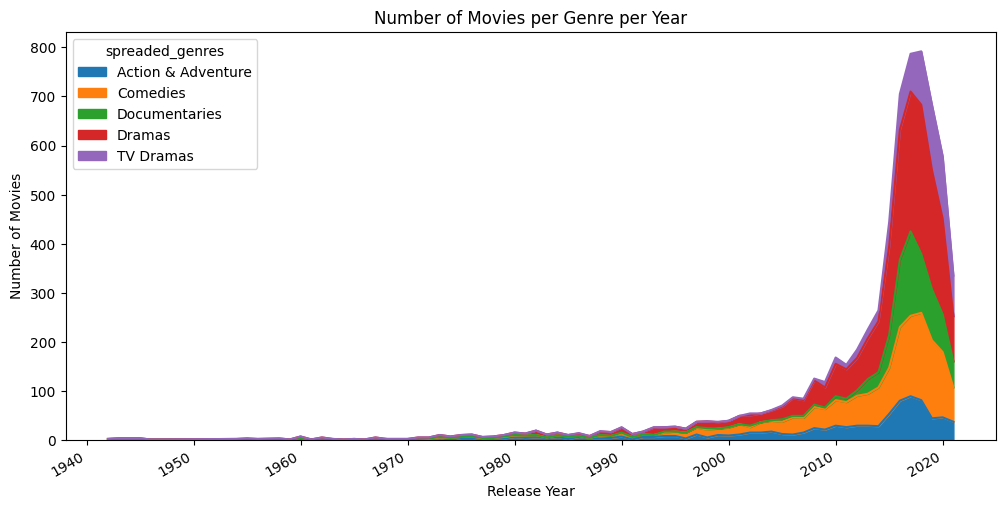

In [107]:
# Distribution of generes across years

top_five_generes = generes_exploded['spreaded_genres'].value_counts().head(7).index.tolist()
top_five_generes.remove('International Movies')
top_five_generes.remove('International TV Shows')
generes_per_year = generes_exploded[generes_exploded['spreaded_genres'].isin(top_five_generes)].groupby(['release_year', 'spreaded_genres']).size().unstack(fill_value=0)
generes_per_year.plot(kind='area', figsize=(12, 6))
plt.title('Number of Movies per Genre per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()